# Hand Gesture Recognition Using CNN

In [82]:
# Importing the required libraries
import numpy as np
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.layers import LeakyReLU

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

In [83]:
# Loading the ASL Alphabet Dataset
Train_DS = pd.read_csv('sign_mnist_train.csv')
Test_DS = pd.read_csv('sign_mnist_test.csv')

In [84]:
Train_DS.info()
Test_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [85]:
Train_DS.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [86]:
Train_DS.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Visualizing the Distribution of Labels in the Datasets

In [87]:
labels_train = Train_DS['label']
labels_test = Test_DS['label']

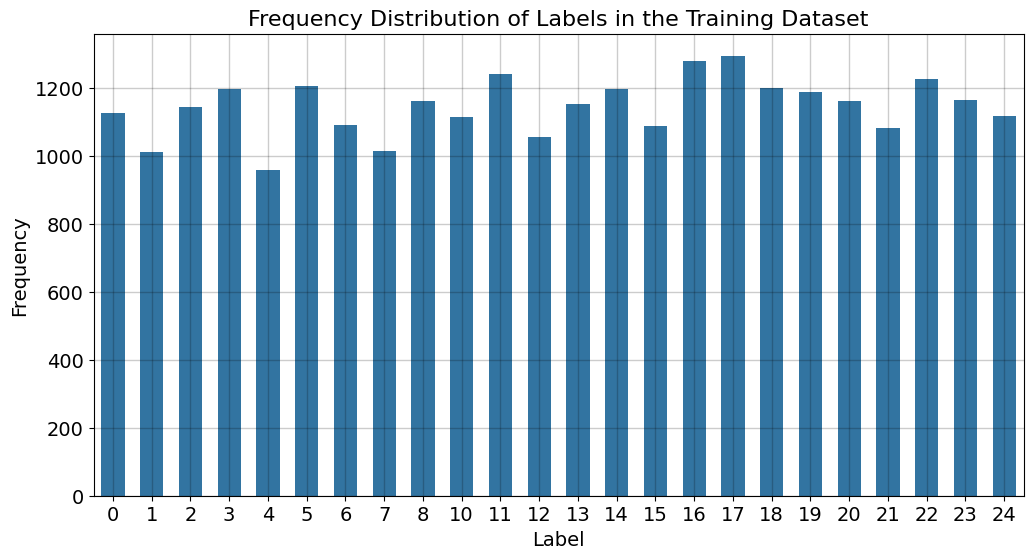

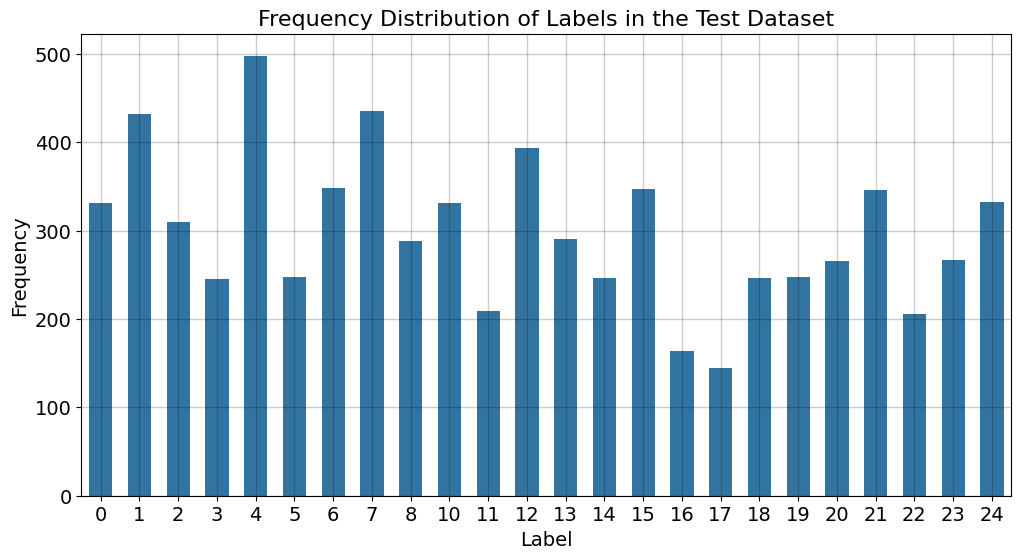

In [196]:
# Bar Plot
plt.figure(figsize=(12,6))
sns.countplot(x=labels_train, width=0.6)
plt.xlabel('Label',color='black',fontsize=14)
plt.ylabel('Frequency',color='black',fontsize=14)
plt.title('Frequency Distribution of Labels in the Training Dataset',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x=labels_test, width=0.6)
plt.xlabel('Label',color='black',fontsize=14)
plt.ylabel('Frequency',color='black',fontsize=14)
plt.title('Frequency Distribution of Labels in the Test Dataset',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

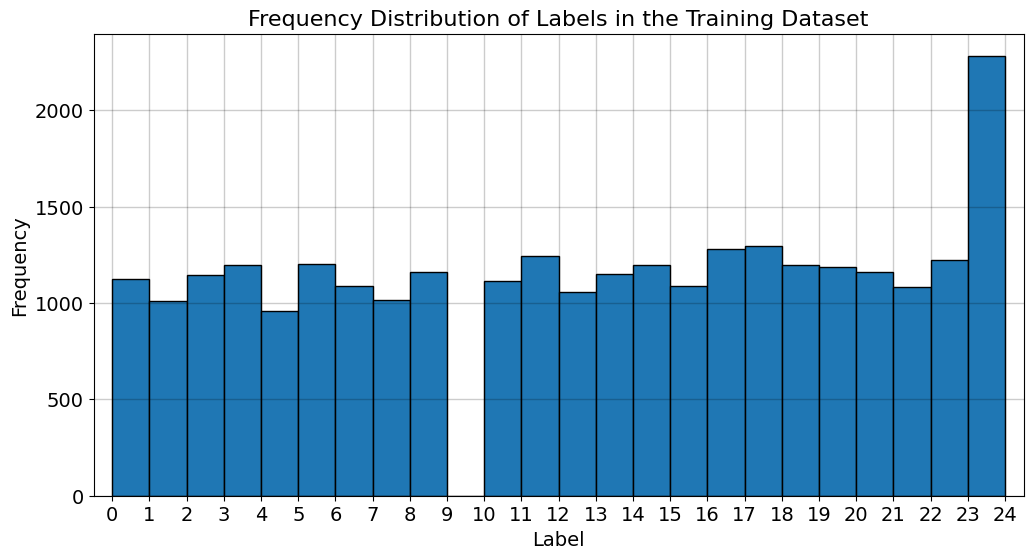

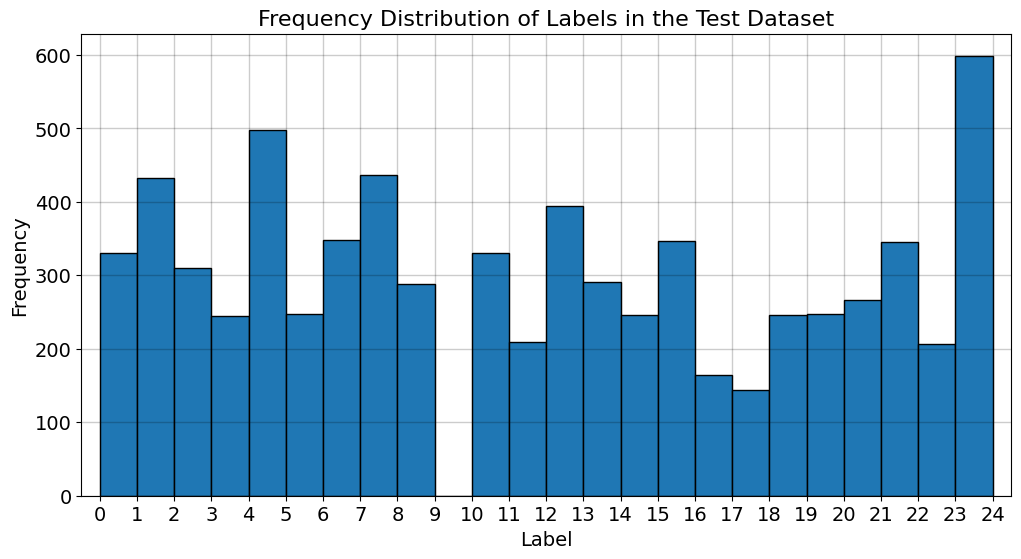

In [197]:
# Histogram
plt.figure(figsize=(12,6))
plt.hist(labels_train, bins=24, edgecolor='black')
plt.xlabel('Label',color='black',fontsize=14)
plt.ylabel('Frequency',color='black',fontsize=14)
plt.title('Frequency Distribution of Labels in the Training Dataset',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(np.arange(min(labels_train), max(labels_train)+1, 1))
plt.xlim((-0.5,24.5))
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

plt.figure(figsize=(12,6))
plt.hist(labels_test, bins=24, edgecolor='black')
plt.xlabel('Label',color='black',fontsize=14)
plt.ylabel('Frequency',color='black',fontsize=14)
plt.title('Frequency Distribution of Labels in the Test Dataset',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(np.arange(min(labels_test), max(labels_test)+1, 1))
plt.xlim((-0.5,24.5))
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

## Data Preprocessing

In [90]:
# Dropping labels from the training dataset
Train_Lbl = Train_DS['label']
Train_DSF = Train_DS.drop(['label'],axis=1)
print(Train_DSF.shape)
Train_DSF.head(10)

(27455, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
5,161,168,172,173,178,184,189,193,196,202,...,76,74,68,62,53,55,48,238,255,255
6,134,134,135,135,136,137,137,138,138,138,...,109,102,91,65,138,189,179,181,181,179
7,114,42,74,99,104,109,117,127,142,152,...,214,218,220,223,223,225,227,227,228,228
8,169,174,176,180,183,185,187,188,190,191,...,119,118,123,120,118,114,94,74,61,57
9,189,189,189,190,190,191,190,190,190,189,...,13,53,200,204,201,201,193,175,178,156


In [91]:
# Converting the training dataframe into a numpy array
X_Train = Train_DSF.values
X_Train = Train_DSF.values.reshape(-1,28,28,1)
X_Train.shape

(27455, 28, 28, 1)

In [92]:
# Dropping labels from the test dataset
Test_Lbl = Test_DS['label']
Test_DSF = Test_DS.drop(['label'],axis=1)
print(Test_DSF.shape)
Test_DSF.head(10)

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
5,72,79,87,101,115,124,131,135,139,142,...,187,189,192,193,194,194,194,195,195,194
6,93,100,112,118,123,127,131,133,136,139,...,173,175,177,178,180,180,181,181,181,183
7,177,177,177,177,177,178,179,179,178,179,...,232,223,224,224,223,221,221,221,220,219
8,191,194,196,198,201,203,204,205,205,205,...,43,57,78,64,47,62,65,62,62,68
9,171,172,172,173,173,173,173,173,172,172,...,199,199,198,196,195,194,183,85,65,124


In [93]:
# Converting the test dataframe into a numpy array
X_Test = Test_DSF.values
X_Test = Test_DSF.values.reshape(-1,28,28,1)
X_Test.shape

(7172, 28, 28, 1)

In [94]:
# Encoding each output label to a binary array of size 24 (as there are 24 classes)
lbl = LabelBinarizer()
Y_Train = lbl.fit_transform(Train_Lbl)
Y_Test = lbl.fit_transform(Test_Lbl)

In [95]:
print(X_Train.shape,Y_Train.shape,X_Test.shape,Y_Test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [96]:
# Augmenting and normalizing the dataset
# Training dataset
Train_DG = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0,
    height_shift_range = 0.3,
    width_shift_range = 0.3,
    shear_range = 0,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest' )

#Test dataset
X_Test = X_Test/255

Text(0.5, 1.0, 'label: 13  letter: M')

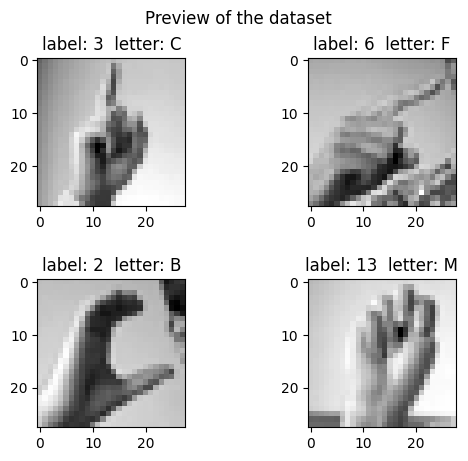

In [97]:
# Visualizing the dataset
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of the dataset')
plt.subplots_adjust(hspace=0.5)

axe[0,0].imshow(X_Train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_Train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_Train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_Train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

## CNN Model

### Defining and Compiling the Model

In [42]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(5,5), strides=1, padding='same', activation=LeakyReLU(alpha=0.001), input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3), strides=1, padding='same'))
model.add(Conv2D(64, kernel_size=(2,2), strides=1, padding='same', activation=LeakyReLU(alpha=0.001), input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=1, padding='same'))
model.add(Conv2D(32, kernel_size=(2,2), strides=1, padding='same', activation=LeakyReLU(alpha=0.001), input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=1, padding='same'))
model.add(Flatten())
model.add(Dense(512, activation=LeakyReLU(alpha=0.001)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.001)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.001)))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

d:\Python\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
d:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the Model

In [43]:
hist = model.fit( 
            Train_DG.flow(X_Train,Y_Train, batch_size = 512), 
            epochs = 50, 
            validation_data = (X_Test,Y_Test), 
            shuffle = True )

Epoch 1/50


d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 368ms/step - accuracy: 0.0465 - loss: 3.1811 - val_accuracy: 0.0584 - val_loss: 3.1496
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 378ms/step - accuracy: 0.0893 - loss: 3.0577 - val_accuracy: 0.1392 - val_loss: 2.7519
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 385ms/step - accuracy: 0.1368 - loss: 2.8532 - val_accuracy: 0.1827 - val_loss: 2.4856
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - accuracy: 0.1926 - loss: 2.5873 - val_accuracy: 0.2577 - val_loss: 2.1506
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - accuracy: 0.2756 - loss: 2.2152 - val_accuracy: 0.3953 - val_loss: 1.7481
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - accuracy: 0.3756 - loss: 1.8652 - val_accuracy: 0.5212 - val_loss: 1.2799
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 397ms/step - accuracy: 0.4503 - loss: 1.6087 - val_accuracy: 0.5860 - val_loss: 1.1469
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step - accuracy: 0.5161 - loss: 1.4024 - val_accuracy: 0.634

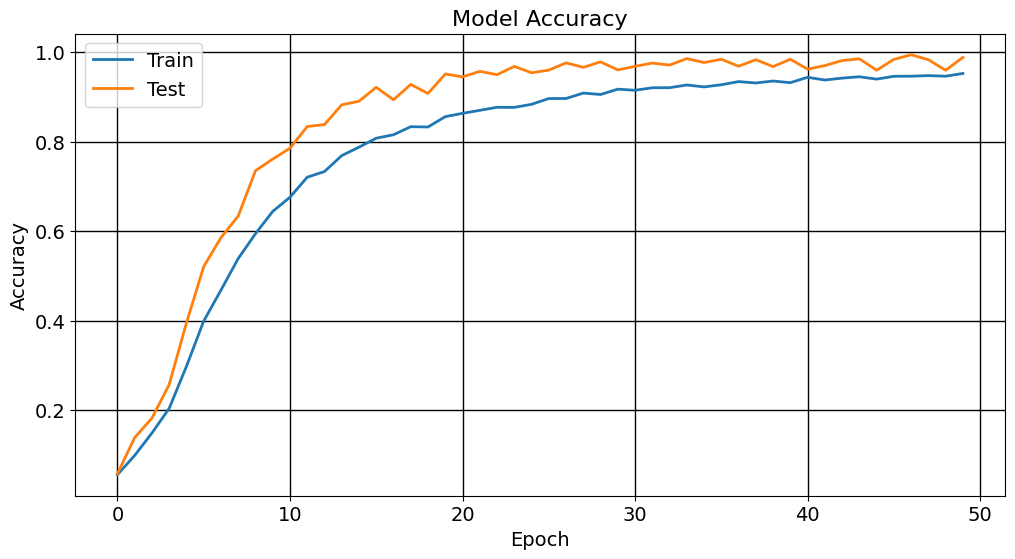

In [45]:
# Training and Test Acuracies
plt.figure(figsize=(12,6))
plt.plot(hist.history['accuracy'],linewidth=2)
plt.plot(hist.history['val_accuracy'],linewidth=2)
plt.grid(True,linewidth=1,color='black',alpha=1)
plt.title('Model Accuracy',fontsize=16)
plt.ylabel('Accuracy',color='black',fontsize=14)
plt.xlabel('Epoch',color='black',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(['Train', 'Test'], loc='upper left',fontsize=14)
plt.show()

In [47]:
(train_loss, train_accuracy) = model.evaluate(x=X_Train, y=Y_Train)
(test_loss, test_accuracy) = model.evaluate(x=X_Test, y=Y_Test)
tr_ac = round(train_accuracy*100,4)
ts_ac = round(test_accuracy*100,4)
print(f"Training Accuracy: {tr_ac:.2f}%")
print(f"Testing Accuracy: {ts_ac:.2f}%")

858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7564 - loss: 195.8199
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9894 - loss: 0.0297
Training Accuracy: 76.00%
Testing Accuracy: 98.87%


In [48]:
# Saving the model
model.save('CNN_HGR.h5')

## Testing the Model

In [49]:
# Testing the model
num_samples = 10

for rn in range(num_samples):
    img = X_Test[rn]
    test_img = img.reshape((1, 28, 28, 1))
    cn = np.argmax(model.predict(test_img))
    print(f"Sample No.: {rn}")
    print(f"Predicted Class: {cn}")
    print(f"Actual Class: {Test_Lbl[rn]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Sample No.: 0
Predicted Class: 6
Actual Class: 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sample No.: 1
Predicted Class: 5
Actual Class: 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sample No.: 2
Predicted Class: 9
Actual Class: 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sample No.: 3
Predicted Class: 0
Actual Class: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Sample No.: 4
Predicted Class: 3
Actual Class: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sample No.: 5
Predicted Class: 20
Actual Class: 21

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sample No.: 6
Predicted Class: 9
Actual Class: 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sample No.: 7
Predicted Class: 13
Actual Class: 14

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Sample No.: 8
Predicted Class: 3
Actual Class: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sample No.: 9
Predicted Class: 7
Actual Class: 7



In [65]:
from tensorflow.keras.models import load_model

# Load the saved model
tr_model = load_model('CNN_HGR.h5', custom_objects={'LeakyReLU': LeakyReLU})

In [98]:
# Predictions for the training dataset
predictions_train = tr_model.predict(X_Train)

# Predictions for the test dataset
predictions_test = tr_model.predict(X_Test)

858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [99]:
predicted_labels_train = np.argmax(predictions_train, axis=1)
predicted_labels_test = np.argmax(predictions_test, axis=1)

Y_Train_Org = np.argmax(Y_Train,axis=1)
Y_Test_Org = np.argmax(Y_Test,axis=1)

### Visualizing the Predictions

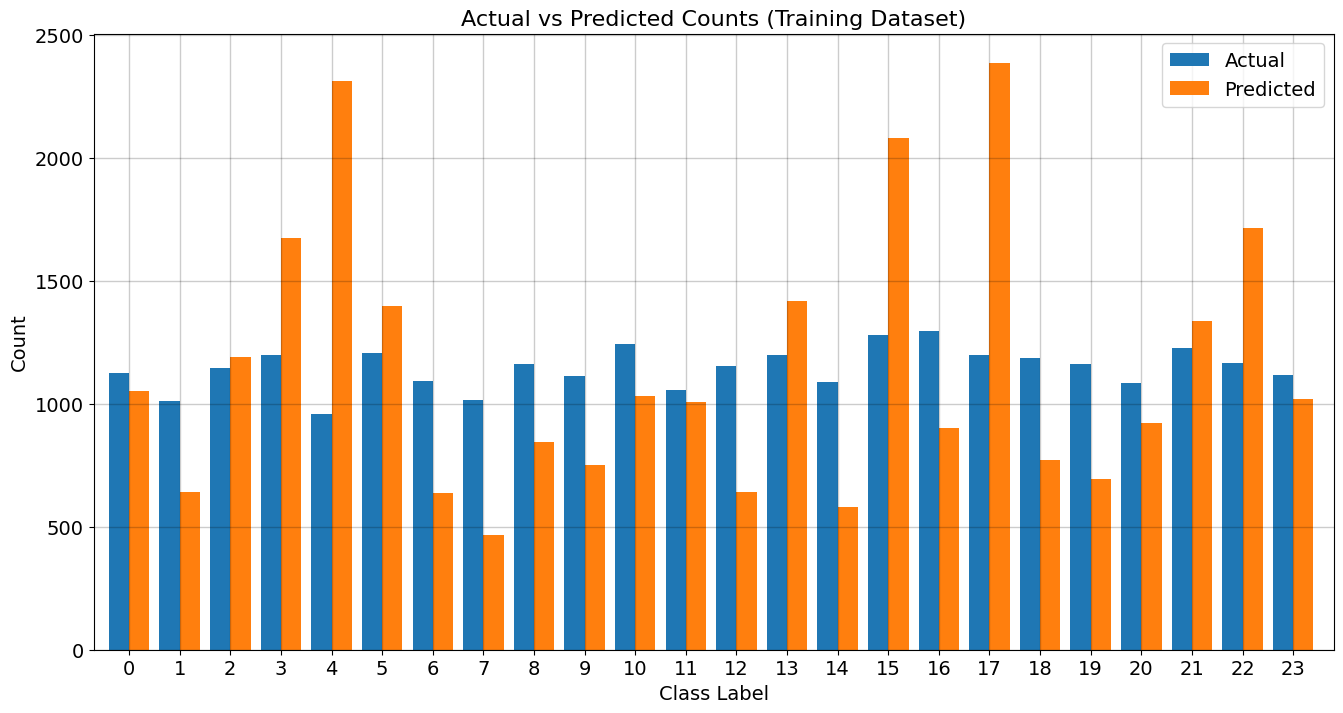

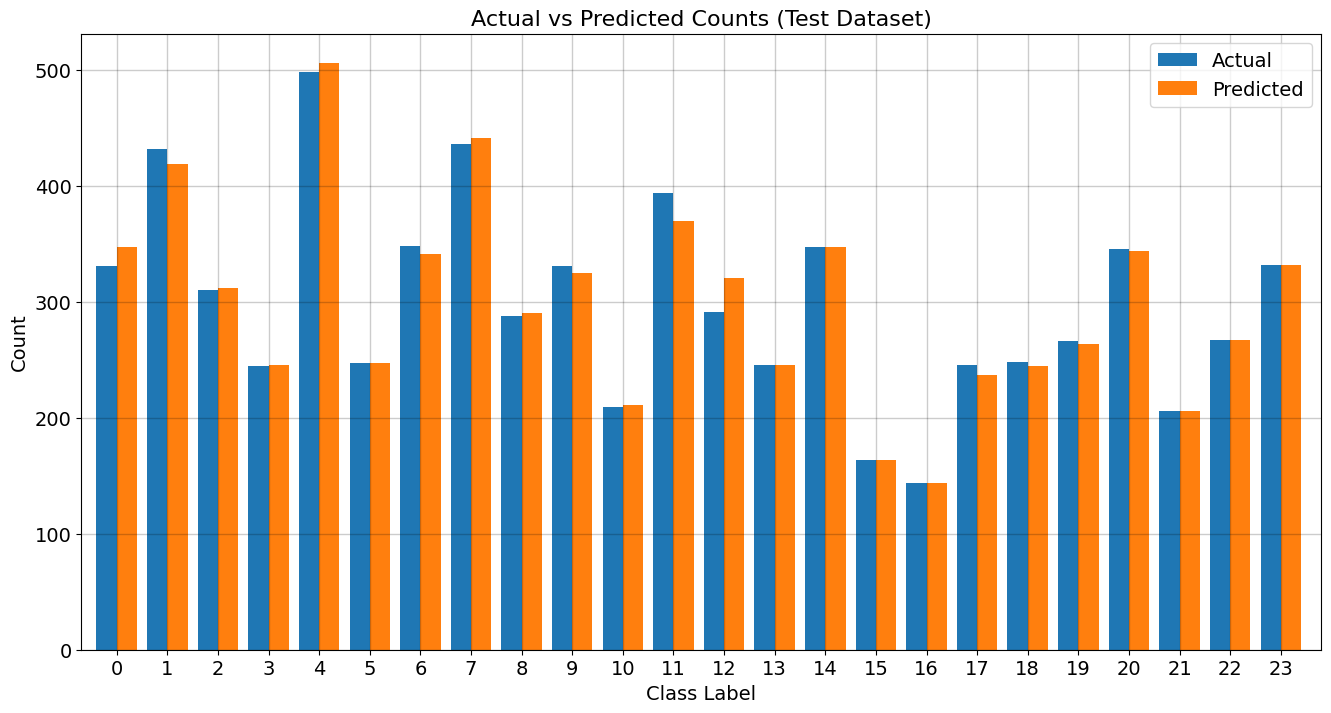

In [183]:
# Count occurrences of each class in actual and predicted labels in the training dataset
actual_counts_train = np.bincount(Y_Train_Org)
predicted_counts_train = np.bincount(predicted_labels_train)
class_labels = np.unique(np.concatenate([Y_Train_Org, predicted_labels_train]))

# Bar plot of actual versus predicted counts for training dataset
plt.figure(figsize=(16,8))
bar_width = 0.4
index = np.arange(len(class_labels))
plt.bar(index, actual_counts_train, bar_width, label='Actual')
plt.bar(index + bar_width, predicted_counts_train, bar_width, label='Predicted')
plt.xlabel('Class Label',color='black',fontsize=14)
plt.ylabel('Count',color='black',fontsize=14)
plt.title('Actual vs Predicted Counts (Training Dataset)',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(index + bar_width / 2, class_labels)
plt.xlim((-0.5,24))
plt.legend(fontsize=14,ncol=1,loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

# Count occurrences of each class in actual and predicted labels in the test dataset
actual_counts_test = np.bincount(Y_Test_Org)
predicted_counts_test = np.bincount(predicted_labels_test)

# Bar plot of actual versus predicted counts for test dataset
plt.figure(figsize=(16,8))
plt.bar(index, actual_counts_test, bar_width, label='Actual')
plt.bar(index + bar_width, predicted_counts_test, bar_width, label='Predicted')
plt.xlabel('Class Label',color='black',fontsize=14)
plt.ylabel('Count',color='black',fontsize=14)
plt.title('Actual vs Predicted Counts (Test Dataset)',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(index + bar_width / 2, class_labels)
plt.xlim((-0.5,24))
plt.legend(fontsize=14,ncol=1,loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

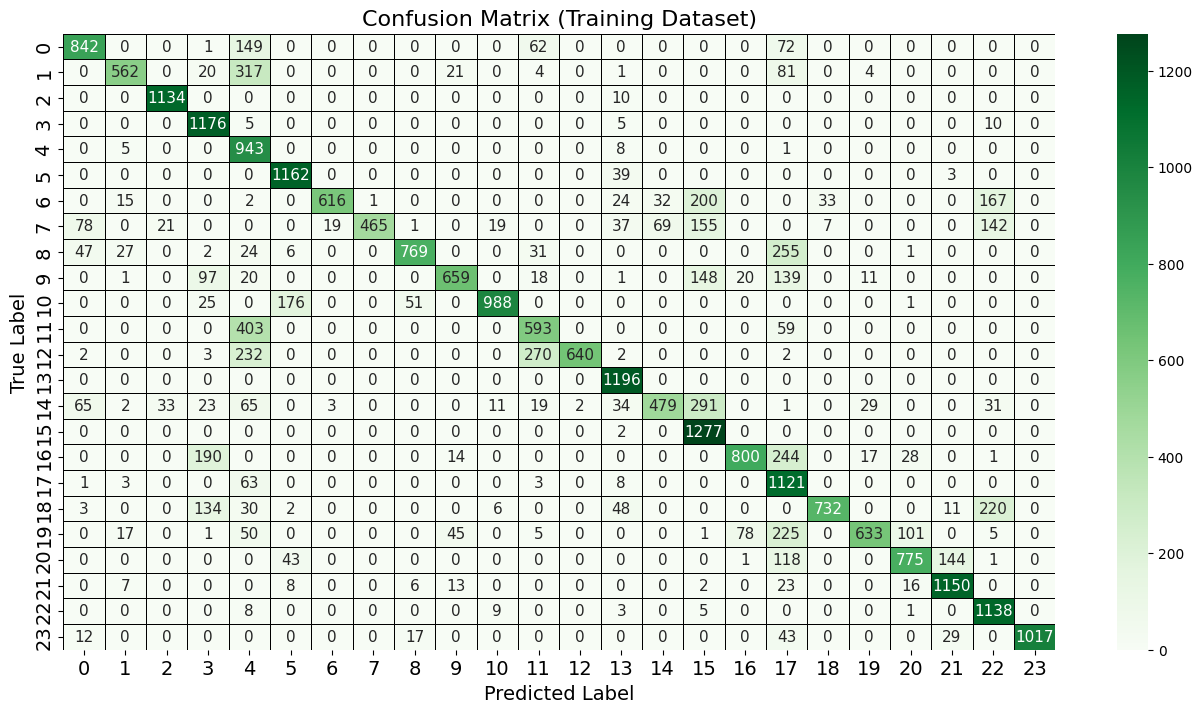

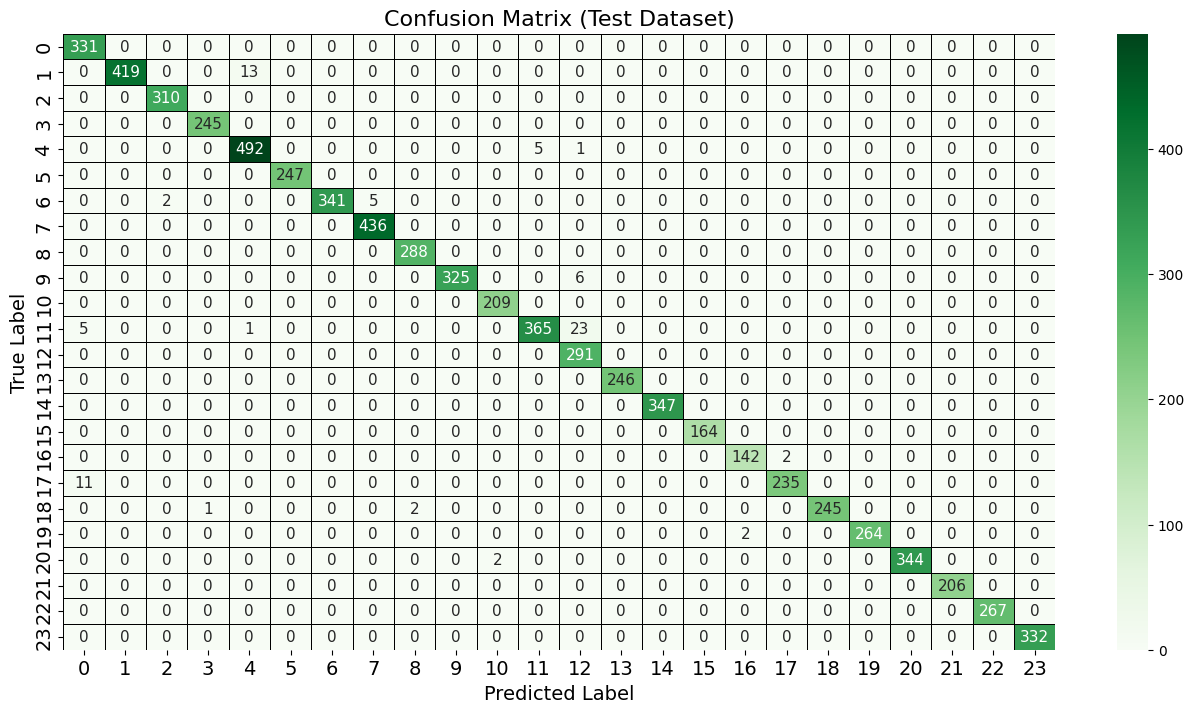

In [160]:
# Compute confusion matrix
cm_train = confusion_matrix(Y_Train_Org, predicted_labels_train)
cm_test = confusion_matrix(Y_Test_Org, predicted_labels_test)

class_names = [i for i in range(24)]

# Plot confusion matrix heatmap for training dataset
plt.figure(figsize=(16,8))
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='d', linewidths=0.5, linecolor='black', 
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 11})
plt.xlabel('Predicted Label',color='black',fontsize=14)
plt.ylabel('True Label',color='black',fontsize=14)
plt.title('Confusion Matrix (Training Dataset)',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Plot confusion matrix heatmap for test dataset
plt.figure(figsize=(16,8))
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='d', linewidths=0.5, linecolor='black', 
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 11})
plt.xlabel('Predicted Label',color='black',fontsize=14)
plt.ylabel('True Label',color='black',fontsize=14)
plt.title('Confusion Matrix (Test Dataset)',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()